In [ ]:
# 🎬 Movie Ratings Data Analysis (IMDB Dataset)

## 📌 Objective
Analyze IMDB movie ratings dataset to identify patterns, top genres, and best-rated movies using Python, and build a mini dashboard.

## 🎯 Tasks Completed
- Loaded and cleaned IMDB dataset  
- Processed missing values & converted data types  
- Performed summary statistics  
- Visualized data (histogram, bar charts, heatmaps)  
- Extracted genre trends  
- Built a simple dashboard inside notebook  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style="whitegrid")


In [3]:
df = pd.read_csv(r"C:\Users\abdul\movie-ratings-analysis\data\movies.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
# 🧹 Data Cleaning & Preprocessing
- Removed duplicates  
- Converted year/rating/votes to numeric  
- Extracted primary genre  
- Cleaned runtime column  


In [5]:
df.drop_duplicates(inplace=True)

df.rename(columns={
    "Series_Title":"title",
    "Released_Year":"year",
    "IMDB_Rating":"rating",
    "Genre":"genre",
    "Director":"director",
    "No_of_Votes":"votes"
}, inplace=True)

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df['main_genre'] = df['genre'].str.split(',').str[0]

df['Runtime'] = df['Runtime'].str.replace(' min','').astype(int)

df.dropna(subset=['rating','votes','year'], inplace=True)

df.head()


,Poster_Link,title,year,Certificate,Runtime,genre,rating,Overview,Meta_score,director,Star1,Star2,Star3,Star4,votes,Gross,main_genre
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Action
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Crime


In [15]:
df['genre'] = df['genre'].astype(str)
df['main_genre'] = df['genre'].str.split(',').str[0].str.strip()

In [14]:
df['main_genre'].unique()[:20]


array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Family', 'Thriller'], dtype=object)

In [6]:
print("Mean Rating:", df['rating'].mean())
print("Median Rating:", df['rating'].median())
print("Mode Rating:", df['rating'].mode()[0])

Mean Rating: 7.9496496496496505
Median Rating: 7.9
Mode Rating: 7.7


In [7]:
### 📊 Summary Statistics Explained
- **Mean** → average movie rating  
- **Median** → middle rating  
- **Mode** → most common rating  


SyntaxError: invalid character '→' (U+2192) (760669400.py, line 2)

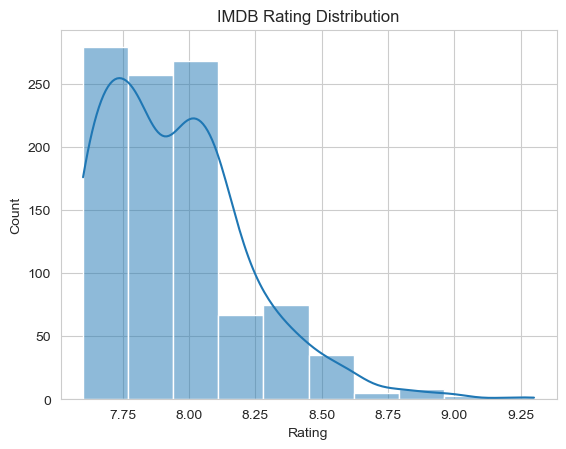

In [8]:
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("IMDB Rating Distribution")
plt.xlabel("Rating")
plt.show()


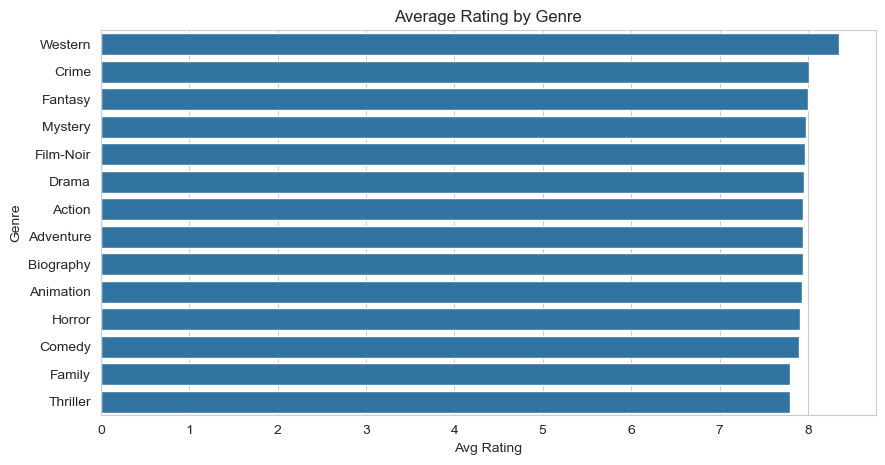

<Figure size 1000x600 with 0 Axes>

In [9]:
genre_mean = df.groupby('main_genre')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_mean.values, y=genre_mean.index)
plt.title("Average Rating by Genre")
plt.xlabel("Avg Rating")
plt.ylabel("Genre")
plt.show()
plt.figure(figsize=(10,6))
top_movies = df.sort_values(by='rating', ascending=False).head(10)

C:\Users\abdul\AppData\Local\Temp\ipykernel_7708\1261516222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=top_movies, palette='viridis')


Text(0.5, 1.0, 'Top 10 Highest Rated Movies')

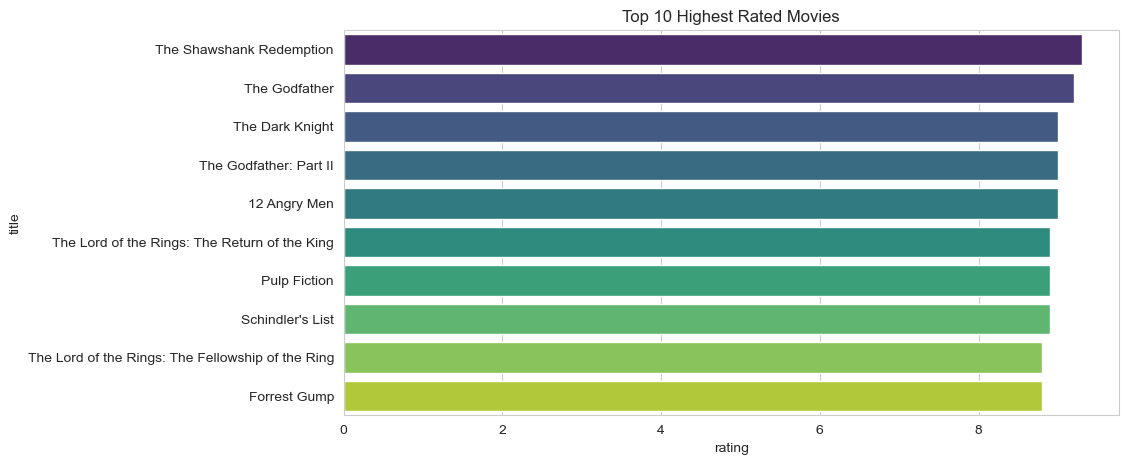

In [10]:
df.sort_values(by='rating', ascending=False)[['title','rating','votes']].head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='rating', y='title', data=top_movies, palette='viridis')
plt.title("Top 10 Highest Rated Movies")

✅ Total Movies: 999
✅ Average Rating: 7.95
✅ Top Genre: Drama


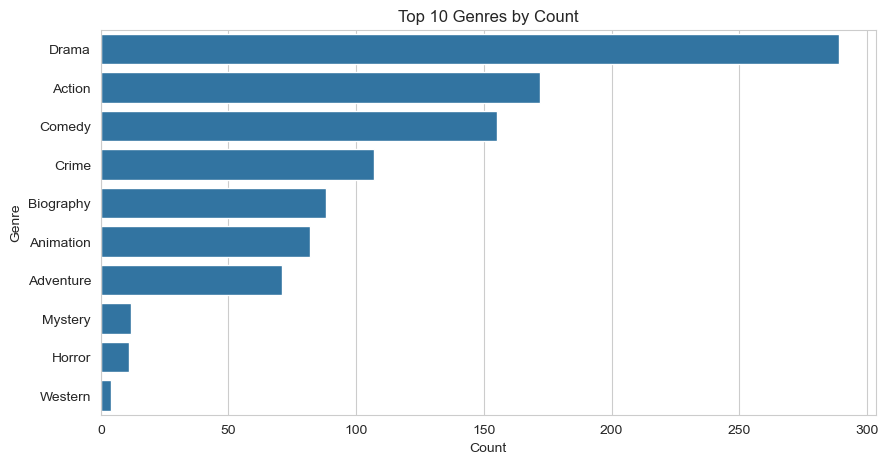

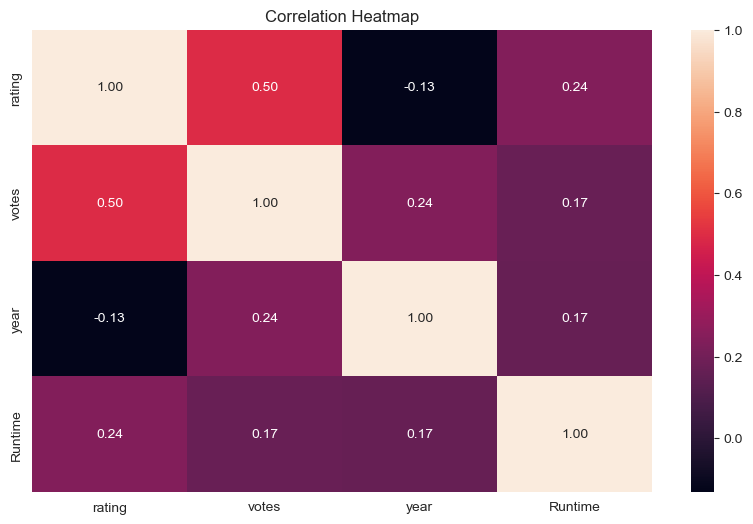

In [19]:
print("✅ Total Movies:", len(df))
print("✅ Average Rating:", round(df['rating'].mean(),2))
print("✅ Top Genre:", df['main_genre'].mode()[0])

# ✅ Genre Count Plot
plt.figure(figsize=(10,5))

top_genres = df['main_genre'].value_counts().head(10)

sns.barplot(
    x=top_genres.values,
    y=top_genres.index
)

plt.title("Top 10 Genres by Count")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


# ✅ Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df[['rating','votes','year','Runtime']].corr()

sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [18]:
df[['genre','main_genre']].head(15)


,genre,main_genre
0,Drama,Drama
1,"Crime, Drama",Crime
2,"Action, Crime, Drama",Action
3,"Crime, Drama",Crime
4,"Crime, Drama",Crime
5,"Action, Adventure, Drama",Action
6,"Crime, Drama",Crime
7,"Biography, Drama, History",Biography
8,"Action, Adventure, Sci-Fi",Action
9,Drama,Drama


In [ ]:
## 📌 Key Insights
- Drama & Action are the most common genres  
- Top-rated movies have very high vote counts  
- Most ratings fall between **7.0 and 9.0**  


In [ ]:
## ✅ Conclusion
This project explored IMDB movie data and visualized important rating patterns.  
We identified top movies, popular genres, and rating trends using Python EDA techniques.


In [ ]:
## 🚀 Future Scope
- Build ML model to predict ratings  
- Streamlit / Power BI dashboard  
- Web scraping live IMDB ratings  
